In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.1.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist=keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(x_train)

255

In [9]:
np.mean(x_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_name=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

 Data exploration

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

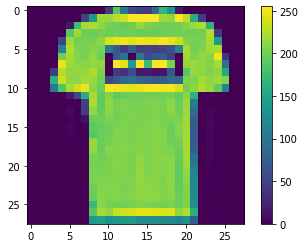

In [14]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [15]:
# #for Neural network value should be between 0 to 1 so
x_train=x_train/255.0
# x_test=x_test/255.0

In [16]:
x_test=x_test/255.0

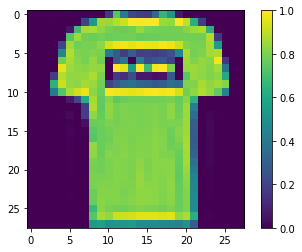

In [17]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [83]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [86]:
history=model.fit(x_train,y_train,epochs=7,batch_size=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/7
48000/48000 [==============================] - 24s 496us/sample - loss: 0.4946 - accuracy: 0.8245 - val_loss: 0.3987 - val_accuracy: 0.8533
Epoch 2/7
48000/48000 [==============================] - 23s 473us/sample - loss: 0.3769 - accuracy: 0.8606 - val_loss: 0.3776 - val_accuracy: 0.8628
Epoch 3/7
48000/48000 [==============================] - 23s 486us/sample - loss: 0.3395 - accuracy: 0.8750 - val_loss: 0.3697 - val_accuracy: 0.8663
Epoch 4/7
48000/48000 [==============================] - 22s 455us/sample - loss: 0.3164 - accuracy: 0.8832 - val_loss: 0.3694 - val_accuracy: 0.8712
Epoch 5/7
48000/48000 [==============================] - 23s 474us/sample - loss: 0.3015 - accuracy: 0.8892 - val_loss: 0.3278 - val_accuracy: 0.8829
Epoch 6/7
48000/48000 [==============================] - 22s 468us/sample - loss: 0.2830 - accuracy: 0.8943 - val_loss: 0.3284 - val_accuracy: 0.8838
Epoch 7/7
48000/48000 [===========================

In [87]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_acc)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.3664 - accuracy: 0.8693
0.8693


In [88]:
from sklearn.metrics import accuracy_score

In [89]:
y_pred=model.predict_classes(x_test)
accuracy_score(y_test,y_pred)

0.8693

In [90]:
pred=model.predict(x_test)
pred

array([[8.24720917e-11, 6.93402529e-13, 1.12443919e-12, ...,
        7.69532612e-03, 2.18624985e-09, 9.91570950e-01],
       [5.78033068e-05, 5.64225680e-11, 9.97025430e-01, ...,
        1.74108995e-17, 4.83522289e-09, 2.72207278e-13],
       [9.92068081e-13, 1.00000000e+00, 8.67032042e-20, ...,
        2.51906075e-36, 6.05229446e-16, 9.95680202e-30],
       ...,
       [5.47454786e-03, 1.25587041e-12, 9.43718042e-05, ...,
        1.02627895e-09, 9.94230151e-01, 2.81938839e-12],
       [5.69709391e-09, 9.99997258e-01, 4.11121007e-13, ...,
        3.76157607e-22, 4.14286250e-09, 2.11291072e-16],
       [7.46043497e-06, 1.05548716e-08, 3.31310957e-06, ...,
        3.23253055e-03, 3.62282328e-04, 1.17705395e-05]], dtype=float32)

In [91]:
pred[0]

array([8.2472092e-11, 6.9340253e-13, 1.1244392e-12, 4.7900525e-12,
       2.5581759e-12, 7.3375442e-04, 1.3593934e-09, 7.6953261e-03,
       2.1862498e-09, 9.9157095e-01], dtype=float32)

In [92]:
np.argmax(pred[0])

9

# plotting learning curve and confusion matrix

In [93]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [94]:
history

In [95]:
history.history

{'loss': [0.4946469116449589,
  0.37686133313463266,
  0.3395326020850916,
  0.31635276645368626,
  0.3014740422262791,
  0.2830171005127098,
  0.2726511208623803],
 'accuracy': [0.82445836,
  0.86064583,
  0.87504166,
  0.8831875,
  0.8891875,
  0.89427084,
  0.89858335],
 'val_loss': [0.3987260837686093,
  0.3775820935474864,
  0.36971656902343963,
  0.3693997094175332,
  0.3277882989797217,
  0.32838589197044105,
  0.34498435094370505],
 'val_accuracy': [0.85325,
  0.8628333,
  0.8663333,
  0.87125,
  0.8829167,
  0.88383335,
  0.87625]}

In [96]:
import matplotlib.pyplot as plt

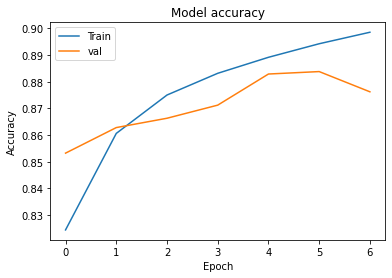

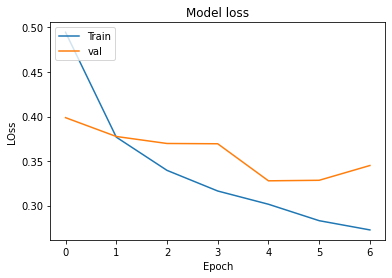

In [97]:
#plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper left')
plt.show()

#plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('LOss')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper left')
plt.show()

# Plotting confusion matrix

In [98]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f64646d68d0>)

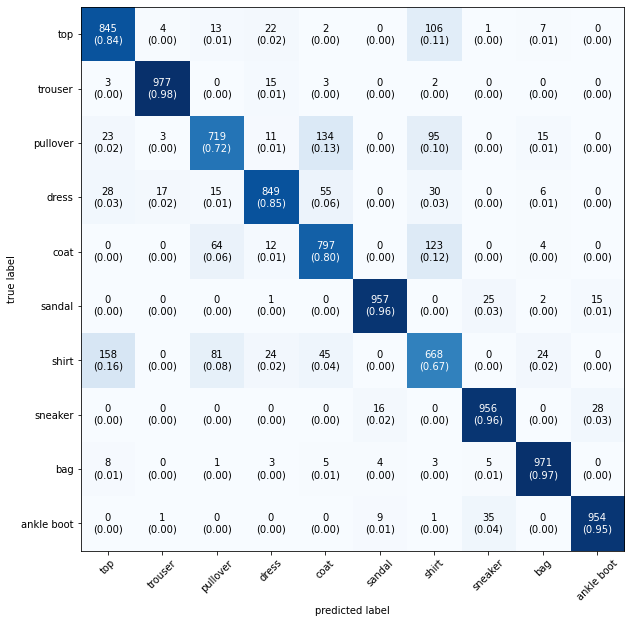

In [99]:
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(10,10),class_names=class_name,show_normed=True)